In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

from datetime import datetime as dt
from datetime import timedelta

import numpy as np
import baltic as bt

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42


block_size=21

start=dt.strptime('2021-03-01','%Y-%m-%d') ## begin timeline here
end=dt.strptime(dt.strftime(dt.today(),'%Y-%m-%d'),'%Y-%m-%d')-timedelta(days=21) ## end timeline on today

countries=['Lithuania','Germany','France','Switzerland','Belgium']


cur_date=end
timeline={}
while cur_date>start:
#     print(cur_date,cur_date-timedelta(days=block_size-1))
    timeline[(cur_date-timedelta(days=block_size-1),cur_date)]={c: {'sequences': 0, 'B.1.620': 0, 'B.1.1.7': 0} for c in countries}
    cur_date=cur_date-timedelta(days=block_size)
    
    
print(timeline.keys())


dict_keys([(datetime.datetime(2021, 6, 9, 0, 0), datetime.datetime(2021, 6, 29, 0, 0)), (datetime.datetime(2021, 5, 19, 0, 0), datetime.datetime(2021, 6, 8, 0, 0)), (datetime.datetime(2021, 4, 28, 0, 0), datetime.datetime(2021, 5, 18, 0, 0)), (datetime.datetime(2021, 4, 7, 0, 0), datetime.datetime(2021, 4, 27, 0, 0)), (datetime.datetime(2021, 3, 17, 0, 0), datetime.datetime(2021, 4, 6, 0, 0)), (datetime.datetime(2021, 2, 24, 0, 0), datetime.datetime(2021, 3, 16, 0, 0))])


In [2]:
import csv

data_path='/Users/evogytis/Downloads/owid-covid-data.csv'

for l in csv.DictReader(open(data_path,'r'),delimiter=','):
#     print(l)
    country=l['location']
    if country in countries:
        
        date=dt.strptime(l['date'],'%Y-%m-%d')
        vacc=l['people_vaccinated_per_hundred']
        cases=l['new_cases']
        
#         print(country,date,cases)
        if cases=='': cases=0
        if vacc=='': vacc=0
        
        timeslice=[t for t in timeline if t[0]<=date<=t[1]] ## get timeslice nearest to datapoint date
        if len(timeslice)==0:
            pass
#             print(date,'not accounted')
        elif len(timeslice)==1:
            t=timeslice[-1]
            
            timeline[t][country]['cases']=float(cases)
            timeline[t][country]['vaccinations']=float(vacc)
        else:
            print('something wrong',date)

meta_path='/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/gisaid/metadata_2021-07-02_11-46.tsv'

for l in csv.DictReader(open(meta_path,'r'),delimiter='\t'):
#     print(l)
    
    country=l['country']
    if l['country_exposure']!=country: country=l['country_exposure']
        
    lin=l['pango_lineage']
    
    date=dt.strptime(l['date'],'%Y-%m-%d') if len(l['date'].replace('-XX',''))==10 else None
    
    if country in countries and date:
        timeslice=[t for t in timeline if t[0]<=date<=t[1]]
        
        if len(timeslice)==0:
            pass
# #             print(date)
        elif len(timeslice)==1:
            t=timeslice[-1]
            
#             if 'sequences' not in timeline[t][country]: timeline[t][country]['sequences']=0
#             if 'B.1.620' not in timeline[t][country]: timeline[t][country]['B.1.620']=0
            timeline[t][country]['sequences']+=1
            
            if lin=='B.1.620':
                timeline[t][country]['B.1.620']+=1
            elif lin=='B.1.1.7':
                timeline[t][country]['B.1.1.7']+=1
        else:
            print('something wrong',date)

Lithuania SpearmanrResult(correlation=0.2571428571428572, pvalue=0.6227871720116618)
Lithuania [647.0, 689.0, 1055.0, 733.0, 217.0, 38.0]
Germany SpearmanrResult(correlation=0.6, pvalue=0.20799999999999982)
Germany [17680.0, 7594.0, 25912.0, 7577.0, 2254.0, 570.0]
France SpearmanrResult(correlation=-0.2571428571428572, pvalue=0.6227871720116618)
France [30067.0, 8055.0, 30324.0, 17224.0, 6022.0, 3396.0]
Switzerland SpearmanrResult(correlation=-0.2, pvalue=0.704)
Switzerland [1439.0, 4933.0, 2136.0, 1241.0, 430.0, 130.0]
Belgium SpearmanrResult(correlation=-0.2571428571428572, pvalue=0.6227871720116618)
Belgium [3166.0, 1710.0, 2947.0, 1820.0, 905.0, 1073.0]


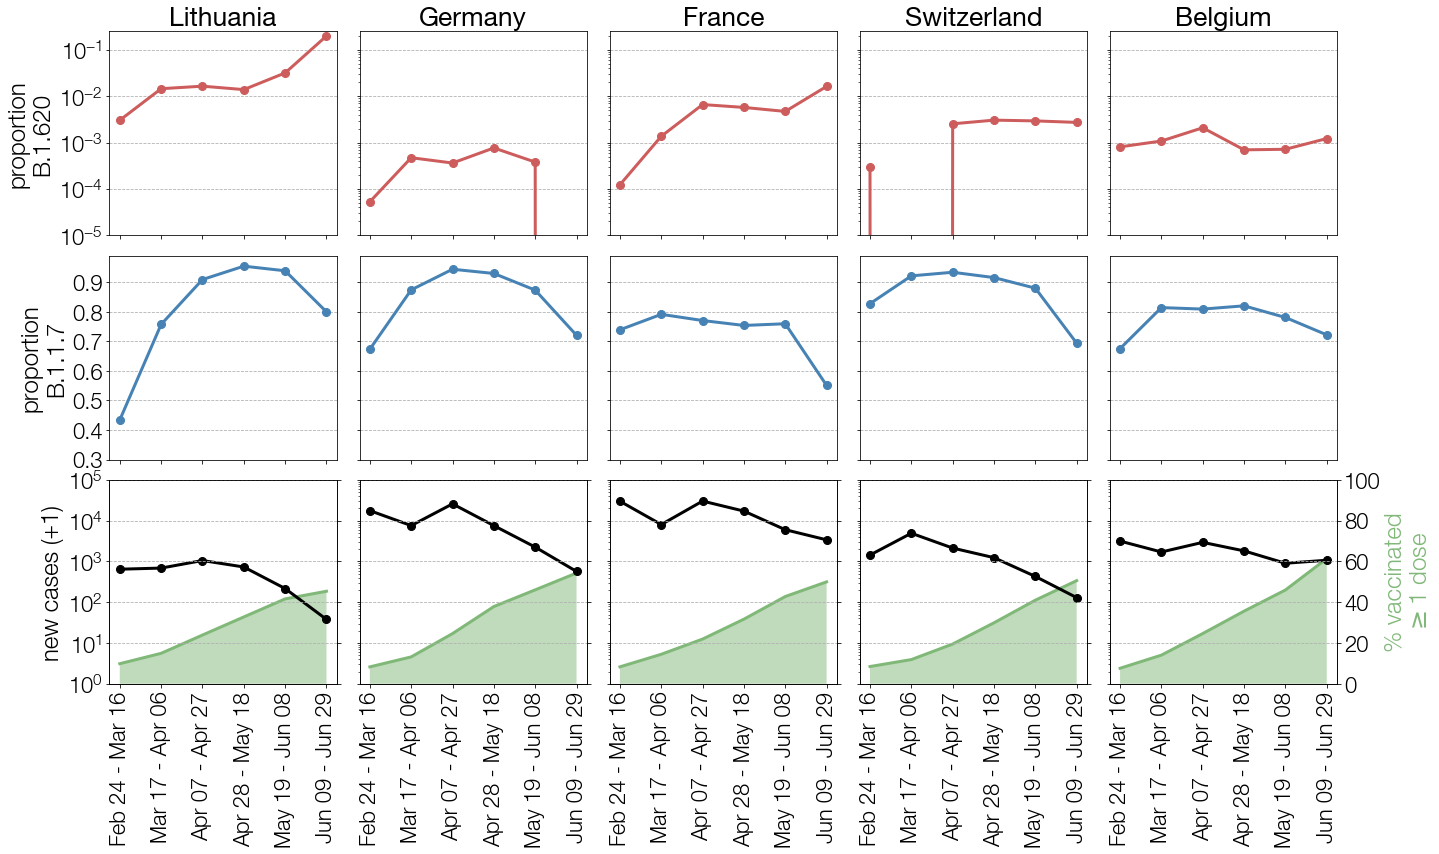

In [3]:
fig = plt.figure(figsize=(22,12),facecolor='w')

gs = GridSpec(3, len(countries),hspace=0.1,wspace=0.1)

from scipy.stats import spearmanr

xs=sorted(timeline.keys())

xlabels=[]

for x in xs:
    start,end=x
    
    xlabels.append('%s - %s'%(dt.strftime(start,'%b %d'),dt.strftime(end,'%b %d')))

for c,country in enumerate(countries):
    ax = plt.subplot(gs[0,c])
    
    ax.set_title(country)
#     ys=[]
#     b=0
#     s=0
#     for i,x in enumerate(xs):
#         fc='dimgrey'

#         b+=timeline[x][country]['B.1.620']
#         s+=timeline[x][country]['sequences']
#         if s>0:
#             ys.append(b/s)
#         else:
#             ys.append(np.nan)
# #             ax.bar(i,b/s,facecolor=fc,edgecolor='none',zorder=2)
            
#     ax.plot(range(len(xs)),ys)
#     ax.set_yscale('log')
#     ax.set_ylim(0.00001,0.2)
#     ###########
#     ax = plt.subplot(gs[1,c])
#     ys=[]
#     b=0
#     s=0
#     for i,x in enumerate(xs):
#         fc='dimgrey'

#         b+=timeline[x][country]['B.1.1.7']
#         s+=timeline[x][country]['sequences']
#         if s>0:
#             ys.append(b/s)
#         else:
#             ys.append(np.nan)
# #             ax.bar(i,b/s,facecolor=fc,edgecolor='none',zorder=2)
            
#     ax.plot(range(len(xs)),ys)
#     ax.set_yscale('log')
#     ax.set_ylim(0.01,1)
    
    
    
    
    ys1=[]
    for i,x in enumerate(xs):
        fc='dimgrey'

        b=timeline[x][country]['B.1.620']
        s=timeline[x][country]['sequences']
        if s>0:
            ys1.append(b/s)
#             ax.bar(i,b/s,facecolor=fc,edgecolor='none',zorder=2)
        else:
            ys1.append(np.nan)
    
    ax.grid(axis='y',ls='--')
    
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
    
    
    ax.plot(range(len(xs)),ys1,marker='o',lw=3,markersize=8,color='indianred',zorder=2)
    ax.plot(range(len(xs)),ys1,marker='o',lw=6,markersize=10,color='w',zorder=1)
    ax.set_yscale('log')
    ax.yaxis.set_major_locator(mpl.ticker.LogLocator(numticks=7))
    
    if c==0:
        ax.set_ylabel('proportion\nB.1.620',size=24)
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(labelsize=0)
    
    ax.set_ylim(0.00001,0.25)
    ###########
    ax = plt.subplot(gs[1,c])
    ys2=[]
    for i,x in enumerate(xs):
        fc='dimgrey'

        b=timeline[x][country]['B.1.1.7']
        s=timeline[x][country]['sequences']
        if s>0:
            ys2.append(b/s)
#             ax.bar(i,b/s,facecolor=fc,edgecolor='none',zorder=2)
        else:
            ys2.append(np.nan)
        
    print(country,spearmanr(ys1,ys2))
            
    ax.plot(range(len(xs)),ys2,marker='o',lw=3,markersize=8,color='steelblue',zorder=2)
    ax.plot(range(len(xs)),ys2,marker='o',lw=6,markersize=10,color='w',zorder=1)
    
    ax.set_ylim(0.3,0.99)
#     ax.set_yscale('log')
    ax.grid(axis='y',ls='--')
    
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
    
    if c==0:
        ax.set_ylabel('proportion\nB.1.1.7',size=24)
        ax.set_xticklabels([])
#         ax.tick_params(axis='x',labelsize=0)
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(labelsize=0)
        
    
    
    ###########
    ax = plt.subplot(gs[2,c],zorder=2,facecolor='none')
    
    cs=[timeline[x][country]['cases']+1 for x in xs]
    print(country,cs)

    ax.plot(range(len(xs)),cs,zorder=1,color='k',lw=3,markersize=8,marker='o')
    ax.set_yscale('log')
    ax.set_ylim(1,100005)
#     ax.set_ylim(1,10000005)
    
    ax.grid(axis='y',ls='--')
    
    ax2=ax.twinx()
    ax2.set_zorder(0)
    vc='#80B878'
    vs=[timeline[x][country]['vaccinations'] for x in xs]
    ax2.plot(range(len(xs)),vs,zorder=1,lw=3,color=vc)
    ax2.fill_between(range(len(xs)),vs,zorder=0,facecolor=vc,edgecolor='none',alpha=0.5)
    ax2.set_ylim(0,100)
        
    ax.yaxis.set_major_locator(mpl.ticker.LogLocator(numticks=7))
    ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
    
    if c==0:
        ax.set_ylabel('new cases (+1)',size=24)
    else:
        ax.set_yticklabels([])
        ax.tick_params(axis='y',labelsize=0)
        
    if c==len(countries)-1:
        ax2.yaxis.set_label_position('right')
        ax2.set_ylabel('% vaccinated\n$\geq$1 dose',color=vc,size=24)
        
    else:
        ax2.set_yticklabels([])
        ax2.tick_params(labelsize=0)
    
    ax.set_xticks(range(len(xs)))
    ax.set_xticklabels(xlabels,rotation=90)
    
plt.savefig('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/figures/SuppFig6_B.1.620_fate.png',dpi=100,bbox_inches='tight')

plt.show()

In [4]:
import csv,re
from collections import Counter

data_path='/Users/evogytis/Dropbox/Jupyter_notebooks/LTU_seq/annotate/meta/sujungtos_imties_lenteles_su_nextclade_pango.csv'

reinfection=re.compile('extra: PGR\+ [0-9]sav po II skiepo')

lins=[]
all_lins=[]

for l in csv.DictReader(open(data_path,'r'),delimiter=','):
    reason=l['selection_reason']
    lineage=l['lineage']
    date=l['sample_taken_date']
    
    
    if date!='' and lineage not in ['None','B.1','B.1.1']:
        
        if bt.decimalDate(date)>=bt.decimalDate('2021-03-15'):
            all_lins.append(lineage)

            if reinfection.search(reason):
        #         print(lineage,reason)
                lins.append(lineage)
    
print(Counter(lins))
print(Counter(all_lins))

evade=Counter(lins)
total=Counter(all_lins)

print(sum(evade.values()),sum(total.values()))

for lin in evade:
    print(lin,evade[lin],total[lin],(evade[lin]/sum(evade.values()))/(total[lin]/sum(total.values())))

Counter({'B.1.1.7': 201, 'B.1.620': 11, 'B.1.617.2': 3, 'B.1.1.523': 2, 'B.1.400': 2, 'B.1.177.60': 1, 'B.1.177': 1, 'B.1.526': 1})
Counter({'B.1.1.7': 9401, 'B.1.177.60': 800, 'B.1.620': 226, 'B.1.177': 80, 'B.1.617.2': 78, 'B.1.1.374': 72, 'B.1.400': 37, 'B.1.1.243': 21, 'C.36.3': 17, 'B.1.1.280': 16, 'B.1.221': 11, 'C.36': 10, 'B.1.526': 7, 'B.1.351': 6, 'B.1.1.12': 6, 'P.1': 6, 'B.1.1.523': 5, 'B.1.1.1': 5, 'U.2': 4, 'B.1.36.36': 4, 'B.1.177.62': 3, 'B.1.1.519': 3, 'B.1.527': 3, 'B.1.1.317': 2, 'B.1.1.318': 2, 'B.1.343': 2, 'B.1.416': 1, 'B.1.1.159': 1, 'B.1.408': 1, 'B.1.1.462': 1, 'B.1.177.7': 1, 'B.1.1.192': 1, 'P.1.1': 1, 'B.1.621': 1, 'B.1.1.135': 1, 'B.1.525': 1})
222 10837
B.1.1.7 201 9401 1.0437058162300157
B.1.620 11 226 2.3759666746392414
B.1.177.60 1 800 0.061019144144144145
B.1.177 1 80 0.6101914414414414
B.1.1.523 2 5 19.526126126126126
B.1.526 1 7 6.973616473616474
B.1.400 2 37 2.638665692719747
B.1.617.2 3 78 1.8775121275121278
